In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0667,  ...,  0.2471,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -0.5373,  ...,  0.1843,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -0.0353,  ...,  0.5059,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -0.4745,  ...,  0.2392,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

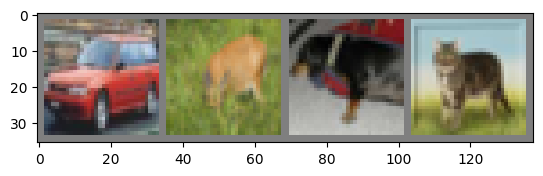

car   deer  dog   cat  


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    print(img)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


In [5]:

img = Image.open("/content/yellow-orange-starburst-flower-nature-jpg-192959431.jpg")

img


In [22]:
len(images[1][0])

32

In [7]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


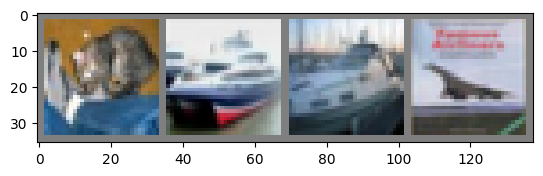

GroundTruth:  cat   ship  ship  plane


In [8]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


In [16]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


Predicted:  car   deer  dog   horse
Accuracy of the network on the 10000 test images: 54 %
Accuracy for class: plane is 41.8 %
Accuracy for class: car   is 53.5 %
Accuracy for class: bird  is 47.2 %
Accuracy for class: cat   is 38.1 %
Accuracy for class: deer  is 39.3 %
Accuracy for class: dog   is 55.7 %
Accuracy for class: frog  is 53.0 %
Accuracy for class: horse is 66.0 %
Accuracy for class: ship  is 76.8 %
Accuracy for class: truck is 70.0 %


In [28]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
data_batch =  unpickle('./data/cifar-10-batches-py/data_batch_1')

In [42]:
print()
for item in data_batch[b'data'][0]:
    print(item)


59
43
50
68
98
119
139
145
149
149
131
125
142
144
137
129
137
134
124
139
139
133
136
139
152
163
168
159
158
158
152
148
16
0
18
51
88
120
128
127
126
116
106
101
105
113
109
112
119
109
105
125
127
122
131
124
121
131
132
133
133
123
119
122
25
16
49
83
110
129
130
121
113
112
112
106
105
128
124
130
127
122
115
120
130
131
139
127
126
127
130
142
130
118
120
109
33
38
87
106
115
117
114
105
107
121
125
109
113
146
133
127
118
117
127
122
132
137
136
131
124
130
132
135
130
125
121
94
50
59
102
127
124
121
120
114
107
125
129
106
108
124
121
108
98
110
117
120
134
140
131
141
135
127
121
119
103
87
75
67
71
84
110
129
136
131
129
119
108
122
123
105
107
111
108
98
94
97
83
88
102
97
88
118
140
136
120
107
88
67
35
32
97
111
123
130
136
132
122
121
127
138
124
120
107
80
68
74
101
105
65
58
63
78
136
122
139
151
129
108
95
96
89
66
115
119
130
140
133
127
138
137
131
133
134
108
72
51
41
72
181
209
125
68
64
82
123
112
135
151
137
114
105
101
126
102
137
128
132
128
119
123
128
130
